Q1

Matrix multiplication between a (n, k) matrix and a (k, m) matrix involves computing the dot product of each row of the first matrix with each column of the second matrix.

Therefore, the total number of multiplications in the matrix multiplication is n*k*m and the total number of additions is n*k*(m-1).

Q2

In [3]:
import time
import numpy as np

def matrix_multiply_lists(matrix_a, matrix_b):
    # Check if the matrices can be multiplied
    if len(matrix_a[0]) != len(matrix_b):
        raise ValueError("Matrices cannot be multiplied. Inner dimensions must match.")

    result = [[0 for _ in range(len(matrix_b[0]))] for _ in range(len(matrix_a))]

    for i in range(len(matrix_a)):
        for j in range(len(matrix_b[0])):
            for k in range(len(matrix_b)):
                result[i][j] += matrix_a[i][k] * matrix_b[k][j]

    return result

# Example matrices
matrix_a = [[1, 2], [3, 4], [5, 6]]
matrix_b = [[7, 8], [9, 10]]

# Using lists of lists
start_time_lists = time.time()
result_lists = matrix_multiply_lists(matrix_a, matrix_b)
end_time_lists = time.time()
time_lists = end_time_lists - start_time_lists

# Using NumPy
matrix_a_np = np.array(matrix_a)
matrix_b_np = np.array(matrix_b)

start_time_numpy = time.time()
result_numpy = np.dot(matrix_a_np, matrix_b_np)
end_time_numpy = time.time()
time_numpy = end_time_numpy - start_time_numpy

# Comparing results
print("Result using lists of lists:")
print(result_lists)

print("\nResult using NumPy:")
print(result_numpy)

# Comparing timing
print("\nTime taken using lists of lists:", time_lists, "seconds")
print("Time taken using NumPy:", time_numpy, "seconds")

# Comparing which one is faster
if time_numpy < time_lists:
    print("\nNumPy is faster.")
else:
    print("\nLists of lists are faster.")


Result using lists of lists:
[[25, 28], [57, 64], [89, 100]]

Result using NumPy:
[[ 25  28]
 [ 57  64]
 [ 89 100]]

Time taken using lists of lists: 0.00016546249389648438 seconds
Time taken using NumPy: 0.00015401840209960938 seconds

NumPy is faster.


In most cases, NumPy is expected to be faster than using lists of lists for matrix multiplication. NumPy is implemented in C and optimized for numerical operations, making it more efficient for large matrix computations compared to pure Python implementations with lists. The time difference becomes more significant as the size of matrices increases.

Q3

In [4]:
def find_median_sort(arr):
    sorted_arr = sorted(arr)
    n = len(arr)
    if n % 2 == 0:
        # If the array has an even number of elements, average the middle two
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2
    else:
        # If the array has an odd number of elements, return the middle element
        return sorted_arr[n // 2]


# Example array
arr = [4, 2, 7, 1, 9, 3, 6, 5, 8, 14]

# Using sorting to find the median
start_time_sort = time.time()
median_sort = find_median_sort(arr)
end_time_sort = time.time()
time_sort = end_time_sort - start_time_sort

# Using NumPy's median routine
start_time_numpy = time.time()
median_numpy = np.median(arr)
end_time_numpy = time.time()
time_numpy = end_time_numpy - start_time_numpy

# Comparing results
print("Median using sorting:", median_sort)
print("Median using NumPy:", median_numpy)

# Comparing timing
print("\nTime taken using sorting:", time_sort, "seconds")
print("Time taken using NumPy:", time_numpy, "seconds")


Median using sorting: 5.5
Median using NumPy: 5.5

Time taken using sorting: 8.630752563476562e-05 seconds
Time taken using NumPy: 0.003226757049560547 seconds


In [5]:
import time
import numpy as np

def find_median_sort(arr):
    sorted_arr = sorted(arr)
    n = len(arr)
    if n % 2 == 0:
        # If the array has an even number of elements, average the middle two
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2
    else:
        # If the array has an odd number of elements, return the middle element
        return sorted_arr[n // 2]

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1

    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quickselect(arr, low, high, k):
    if low <= high:
        pivot_index = partition(arr, low, high)

        if pivot_index == k:
            return arr[pivot_index]
        elif pivot_index < k:
            return quickselect(arr, pivot_index + 1, high, k)
        else:
            return quickselect(arr, low, pivot_index - 1, k)

def find_median_quickselect(arr):
    n = len(arr)
    if n % 2 == 0:
        # If the array has an even number of elements, average the middle two
        return (quickselect(arr, 0, n - 1, n // 2 - 1) + quickselect(arr, 0, n - 1, n // 2)) / 2
    else:
        # If the array has an odd number of elements, return the middle element
        return quickselect(arr, 0, n - 1, n // 2)

# Example array
arr = [4, 2, 7, 1, 9, 3, 6, 5, 8]

# Using sorting to find the median
start_time_sort = time.time()
median_sort = find_median_sort(arr)
end_time_sort = time.time()
time_sort = end_time_sort - start_time_sort

# Using quickselect to find the median
start_time_quickselect = time.time()
median_quickselect = find_median_quickselect(arr)
end_time_quickselect = time.time()
time_quickselect = end_time_quickselect - start_time_quickselect

# Using NumPy's median routine
start_time_numpy = time.time()
median_numpy = np.median(arr)
end_time_numpy = time.time()
time_numpy = end_time_numpy - start_time_numpy

# Comparing results
print("Median using sorting:", median_sort)
print("Median using quickselect:", median_quickselect)
print("Median using NumPy:", median_numpy)

# Comparing timing
print("\nTime taken using sorting:", time_sort, "seconds")
print("Time taken using quickselect:", time_quickselect, "seconds")
print("Time taken using NumPy:", time_numpy, "seconds")


Median using sorting: 5
Median using quickselect: 5
Median using NumPy: 5.0

Time taken using sorting: 8.344650268554688e-05 seconds
Time taken using quickselect: 8.559226989746094e-05 seconds
Time taken using NumPy: 0.0003457069396972656 seconds


Q4

f(x,y) = x²y + y³sin(x)

∂f/∂x = 2xy + y³cos(x)

∂f/∂y = x² + 3y²sin(x)

Q5

In [6]:
import jax
import jax.numpy as jnp

# Define the function f(x, y)
def f(x, y):
    return (x**2) * y + (y**3) * jnp.sin(x)

# Define the gradient functions using JAX
grad_x_fun = jax.grad(f, argnums=0)
grad_y_fun = jax.grad(f, argnums=1)

# Specify values for x and y
x = jnp.float32(2.0)
y = jnp.float32(3.0)

# Compute the function value and its derivatives
f_value = f(x, y)
f_x = grad_x_fun(x, y)
f_y = grad_y_fun(x, y)

# Print the results with appropriate formatting
print(f'Function value at X = {x} and Y = {y} is: {f_value:.4f}')
print(f'Function derivative w.r.t X at X = {x} and Y = {y} is: {f_x:.4f}')
print(f'Function derivative w.r.t Y at X = {x} and Y = {y} is: {f_y:.4f}')


Function value at X = 2.0 and Y = 3.0 is: 36.5510
Function derivative w.r.t X at X = 2.0 and Y = 3.0 is: 0.7640
Function derivative w.r.t Y at X = 2.0 and Y = 3.0 is: 28.5510


Q6

In [7]:
from sympy import symbols, diff, sin

# Define the symbolic variables x and y
x, y = symbols('x y')

# Define the function f(x, y)
f = (x**2)*y + (y**3)*(sin(x))

# Calculate the partial derivatives of f with respect to x and y
df_dx = diff(f, x)
df_dy = diff(f, y)

# Specify the values for x and y at which to evaluate the derivatives
x_value = 2.0
y_value = 3.0

# Substitute the values into the derivatives to get the numerical results
derivative_wrt_x_value = df_dx.subs({x: x_value, y: y_value})
derivative_wrt_y_value = df_dy.subs({x: x_value, y: y_value})

# Print the results with appropriate formatting
print(f"The derivative with respect to x at x = {x_value} and y = {y_value} is: {derivative_wrt_x_value.evalf():.4f}")

# Print the results with appropriate formatting
print(f"The derivative with respect to y at x = {x_value} and y = {y_value} is: {derivative_wrt_y_value.evalf():.4f}")


The derivative with respect to x at x = 2.0 and y = 3.0 is: 0.7640
The derivative with respect to y at x = 2.0 and y = 3.0 is: 28.5510


Q7

In [8]:
students_data = {
    2022: {
        'Branch 1': {
            'Roll Number': 1,
            'Name': 'A',
            'Marks': {
                'Maths': 100,
                'English': 70,
                # Add more subjects and marks as needed
            }
        },
        'Branch 2': {
            'Roll Number': 2,
            'Name': 'B',
            'Marks': {
                'Maths': 80,
                'English': 75,

            }

        }
    },
    2023: {
        'Branch 1': {
            'Roll Number': 3,
            'Name': 'C',
            'Marks': {
                'Maths': 60,
                'English': 70,

            }},
        'Branch 2': {
            'Roll Number': 4,
            'Name': 'D',
            'Marks': {
                'Maths': 95,
                'English': 85,

            }},
    },
    2024: {
        'Branch 1': {
            'Roll Number': 5,
            'Name': 'E',
            'Marks': {
                'Maths': 80,
                'English': 90,

            }
        },
        'Branch 2': {
            'Roll Number': 6,
            'Name': 'F',
            'Marks': {
                'Maths': 70,
                'English': 100,

            }
        },
    },

}

Q8

In [15]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks  # Dictionary with subjects and marks


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []  # List of Student objects


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []  # List of Branch objects


# Creating instances for each student
student1 = Student(1, 'A', {'Maths': 100, 'English': 70})
student2 = Student(2, 'B', {'Maths': 80, 'English': 75})
student3 = Student(3, 'C', {'Maths': 60, 'English': 70})
student4 = Student(4, 'D', {'Maths': 95, 'English': 85})
student5 = Student(5, 'E', {'Maths': 80, 'English': 90})
student6 = Student(6, 'F', {'Maths': 70, 'English': 100})

# Creating instances for each branch
branch1_2022 = Branch('Branch 1')
branch2_2022 = Branch('Branch 2')
branch1_2023 = Branch('Branch 1')
branch2_2023 = Branch('Branch 2')
branch1_2024 = Branch('Branch 1')
branch2_2024 = Branch('Branch 2')

# Adding students to branches
branch1_2022.students = [student1]
branch2_2022.students = [student2]
branch1_2023.students = [student3]
branch2_2023.students = [student4]
branch1_2024.students = [student5]
branch2_2024.students = [student6]

# Creating instances for each year
year_2022 = Year(2022)
year_2023 = Year(2023)
year_2024 = Year(2024)

# Adding branches to years
year_2022.branches = [branch1_2022, branch2_2022]
year_2023.branches = [branch1_2023, branch2_2023]
year_2024.branches = [branch1_2024, branch2_2024]

# Creating a list of years
database = [year_2022, year_2023, year_2024]


Q9

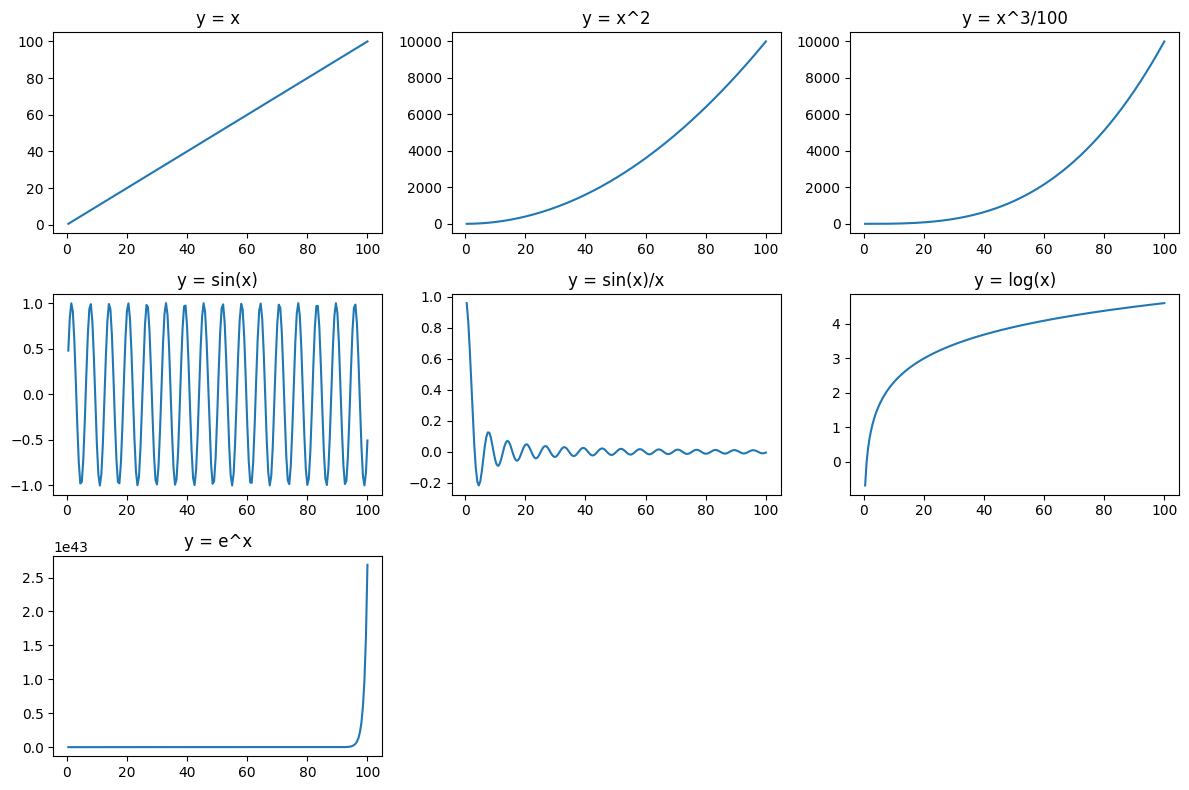

In [10]:
import matplotlib.pyplot as plt

# Define the functions
def y_x(x):
    return x

def y_x_squared(x):
    return x**2

def x_cubed_over_100(x):
    return x**3 / 100

def y_sin_x(x):
    return np.sin(x)

def y_sin_x_over_x(x):
    return np.sin(x) / x

def y_log_x(x):
    return np.log(x)

def y_exp_x(x):
    return np.exp(x)

# Generate x values
x_values = np.arange(0.5, 100.5, 0.5)

# Plotting the functions
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 1)
plt.plot(x_values, y_x(x_values))
plt.title('y = x')

plt.subplot(3, 3, 2)
plt.plot(x_values, y_x_squared(x_values))
plt.title('y = x^2')

plt.subplot(3, 3, 3)
plt.plot(x_values, x_cubed_over_100(x_values))
plt.title('y = x^3/100')

plt.subplot(3, 3, 4)
plt.plot(x_values, y_sin_x(x_values))
plt.title('y = sin(x)')

plt.subplot(3, 3, 5)
plt.plot(x_values, y_sin_x_over_x(x_values))
plt.title('y = sin(x)/x')

plt.subplot(3, 3, 6)
plt.plot(x_values, y_log_x(x_values))
plt.title('y = log(x)')

plt.subplot(3, 3, 7)
plt.plot(x_values, y_exp_x(x_values))
plt.title('y = e^x')

plt.tight_layout()
plt.show()


Q10

In [11]:
import pandas as pd

# Generate a matrix of size 20x5 with random numbers from 1 to 2
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a Pandas DataFrame
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

# Find the column with the highest standard deviation
max_std_column = df.std().idxmax()

# Find the row with the lowest mean
min_mean_row = df.mean(axis=1).idxmin()

# Print the DataFrame
print("Generated DataFrame:")
print(df)

# Print the results
print("\nColumn with the highest standard deviation:", max_std_column)
print("Row with the lowest mean:", min_mean_row)


Generated DataFrame:
           a         b         c         d         e
0   1.657328  1.718279  1.752038  1.530108  1.669524
1   1.257953  1.628071  1.899488  1.215227  1.307963
2   1.106005  1.772660  1.865536  1.095469  1.812301
3   1.397665  1.810795  1.540682  1.621924  1.310082
4   1.461088  1.621869  1.470903  1.907257  1.560772
5   1.284792  1.289344  1.318037  1.451533  1.809958
6   1.685953  1.046975  1.987610  1.605945  1.381030
7   1.060525  1.310853  1.338067  1.250623  1.456647
8   1.934687  1.031050  1.872762  1.911723  1.495755
9   1.903528  1.801319  1.839163  1.186696  1.882553
10  1.978611  1.761061  1.528151  1.919964  1.525547
11  1.064865  1.770646  1.411206  1.369052  1.385097
12  1.146278  1.468780  1.997246  1.255571  1.538370
13  1.331666  1.412024  1.621262  1.569981  1.551412
14  1.338755  1.121183  1.950502  1.581288  1.172816
15  1.560643  1.467683  1.800812  1.075641  1.376671
16  1.721568  1.170532  1.219024  1.977251  1.535849
17  1.684602  1.763401  1

Q11

In [12]:
# Add a new column "f" which is the sum of columns "a", "b", "c", "d", "e"
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Create a new column "g" based on the value in column "f"
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Find the number of rows where the value in column "g" is "LT8"
num_rows_LT8 = df[df['g'] == 'LT8'].shape[0]

# Find the standard deviation of column "f" for rows where "g" is "LT8" and "GT8"
std_LT8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_GT8 = df.loc[df['g'] == 'GT8', 'f'].std()

# Print the updated DataFrame
print("Updated DataFrame:")
print(df)

# Print the results
print("\nNumber of rows where 'g' is 'LT8':", num_rows_LT8)
print("Standard deviation of column 'f' where 'g' is 'LT8':", std_LT8)
print("Standard deviation of column 'f' where 'g' is 'GT8':", std_GT8)


Updated DataFrame:
           a         b         c         d         e         f    g
0   1.657328  1.718279  1.752038  1.530108  1.669524  8.327277  GT8
1   1.257953  1.628071  1.899488  1.215227  1.307963  7.308702  LT8
2   1.106005  1.772660  1.865536  1.095469  1.812301  7.651971  LT8
3   1.397665  1.810795  1.540682  1.621924  1.310082  7.681148  LT8
4   1.461088  1.621869  1.470903  1.907257  1.560772  8.021890  GT8
5   1.284792  1.289344  1.318037  1.451533  1.809958  7.153664  LT8
6   1.685953  1.046975  1.987610  1.605945  1.381030  7.707513  LT8
7   1.060525  1.310853  1.338067  1.250623  1.456647  6.416715  LT8
8   1.934687  1.031050  1.872762  1.911723  1.495755  8.245977  GT8
9   1.903528  1.801319  1.839163  1.186696  1.882553  8.613260  GT8
10  1.978611  1.761061  1.528151  1.919964  1.525547  8.713334  GT8
11  1.064865  1.770646  1.411206  1.369052  1.385097  7.000866  LT8
12  1.146278  1.468780  1.997246  1.255571  1.538370  7.406246  LT8
13  1.331666  1.412024  1.621

Q12

Broadcasting in NumPy is a powerful feature that allows operations on arrays of different shapes and sizes. It enables element-wise operations even when the shapes of the arrays are not identical, by automatically expanding the smaller array to match the shape of the larger array.

In [13]:
# Example arrays
a = np.array([1, 2, 3])
b = np.array(2)

# Broadcasting: adding a scalar to an array
result = a + b

# Print the result
print("Array a:", a)
print("Scalar b:", b)
print("Result after broadcasting:", result)


Array a: [1 2 3]
Scalar b: 2
Result after broadcasting: [3 4 5]


Q13

In [14]:
def custom_argmin(arr):
    min_index = 0  # Assume the first index as the initial minimum index
    min_value = arr[0]  # Assume the first element as the initial minimum value

    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i

    return min_index

# Example array
example_array = np.array([5, 2, 8, 1, 3, 7])

# Using the custom function
result_custom = custom_argmin(example_array)

# Using np.argmin to verify
result_np = np.argmin(example_array)

# Print the results
print("Index of minimum element (custom function):", result_custom)
print("Index of minimum element (np.argmin):", result_np)


Index of minimum element (custom function): 3
Index of minimum element (np.argmin): 3
